In [39]:
# Add our imports at the top here

import csv # lets up load in csv data
import pandas as pd # lets us create a dataframe to see all the data
import numpy as np # lets us really do some cool things with csv data
import matplotlib.pyplot as plt # lets us plot the data
import plotly # more plotting functionality

In [28]:
data_file = 'data.csv' # point to our data file with a variable

df = pd.read_csv(data_file) # load in the data file

df # display the data file

,COOPID,YEAR,MONTH,DAY,PRECIPITATION,MAX TEMP,MIN TEMP,MEAN TEMP
0,80211,1931,1,1,-99.99,-99.9,-99.9,-99.90000
1,80211,1931,1,2,-99.99,-99.9,-99.9,-99.90000
2,80211,1931,1,3,-99.99,-99.9,-99.9,-99.90000
3,80211,1931,1,4,-99.99,-99.9,-99.9,-99.90000
4,80211,1931,1,5,-99.99,-99.9,-99.9,-99.90000
...,...,...,...,...,...,...,...,...
34026,80211,2023,12,28,0.00,65.0,47.0,56.00000
34027,80211,2023,12,29,0.00,54.0,39.0,46.50000
34028,80211,2023,12,30,0.03,60.0,38.0,49.00000
34029,80211,2023,12,31,0.00,61.0,33.0,47.00000


In [30]:
# Lets print our column names real quick
print(df.columns)

Index(['COOPID', ' YEAR', ' MONTH', ' DAY', ' PRECIPITATION', ' MAX TEMP',
       ' MIN TEMP', ' MEAN TEMP'],
      dtype='object')


In [32]:
# Strip the extra spaces from column names
df.columns = df.columns.str.strip()

# We want to remove any NaN/missing values (-99.99)
df = df.replace([-99.9, -99.99], np.nan)
df_clean = df.dropna(subset=['MAX TEMP', 'MIN TEMP'])

# Now we can start to play with our data, see max temperatures, min temperatures, etc
highest_max_temp = df_clean['MAX TEMP'].max()
lowest_max_temp = df_clean['MAX TEMP'].min()
highest_min_temp = df_clean['MIN TEMP'].max()
lowest_min_temp = df_clean['MIN TEMP'].min()

# Display the results
print(f"Highest Max Temp: {highest_max_temp}")
print(f"Lowest Max Temp: {lowest_max_temp}")
print(f"Highest Min Temp: {highest_min_temp}")
print(f"Lowest Min Temp: {lowest_min_temp}")

Highest Max Temp: 103.0
Lowest Max Temp: 30.0
Highest Min Temp: 86.0
Lowest Min Temp: 9.0


In [37]:
# Alright, now we want to start plotting some data. Let's first setup our datetime object

# create a datetime column with error handling
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']], errors='coerce')

# drop rows where DATE is NaT (invalid dates)
df_clean = df.dropna(subset=['DATE'])

# set DATE as index
df_clean.set_index('DATE', inplace=True)

# drop rows with NaN in temperature or precipitation columns
df_clean = df_clean.dropna(subset=['MAX TEMP', 'MIN TEMP', 'PRECIPITATION'])

# verify the cleaned data
print(df_clean.head())

            COOPID  YEAR  MONTH  DAY  PRECIPITATION  MAX TEMP  MIN TEMP  \
DATE                                                                      
1931-03-01   80211  1931      3    1           0.00      73.0      57.0   
1931-03-02   80211  1931      3    2           0.57      59.0      51.0   
1931-03-03   80211  1931      3    3           0.03      55.0      45.0   
1931-03-04   80211  1931      3    4           0.00      53.0      39.0   
1931-03-05   80211  1931      3    5           0.00      57.0      40.0   

            MEAN TEMP  
DATE                   
1931-03-01   65.00000  
1931-03-02   55.00000  
1931-03-03   50.00000  
1931-03-04   46.00000  
1931-03-05   48.50000  


In [41]:
# Plot max temperature

plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['MAX TEMP'], label='Max Temp', color='#FF6B6B')
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

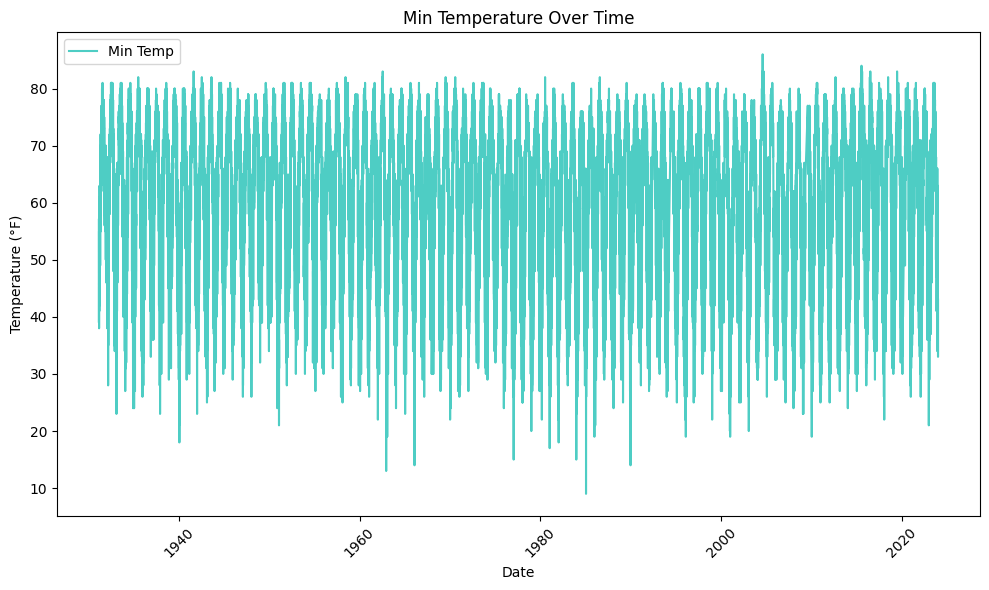

In [42]:
# Plot min temperature
plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['MIN TEMP'], label='Min Temp', color='#4ECDC4')
plt.title('Min Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

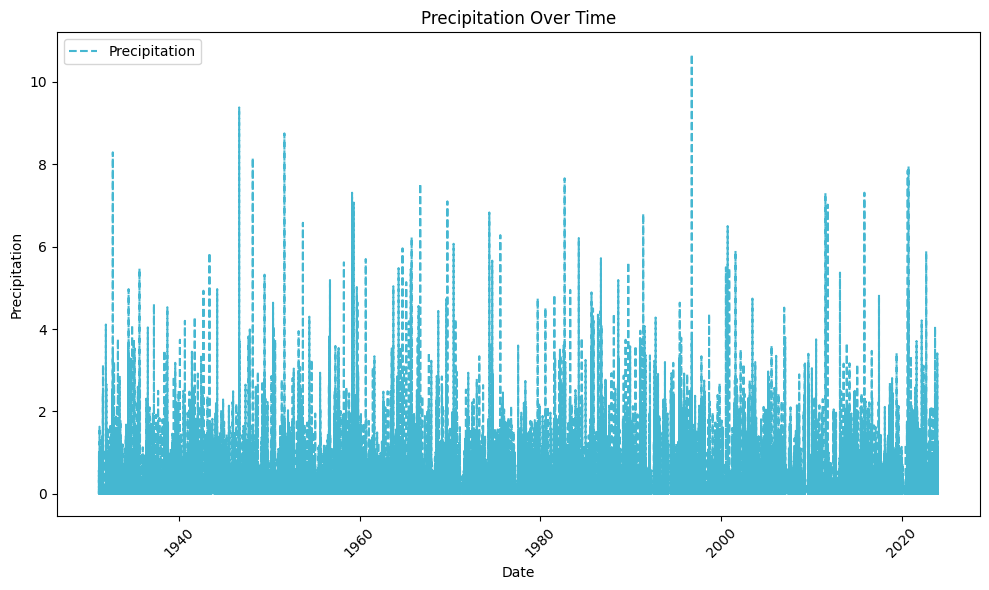

In [44]:
# Plot precipitation
import matplotlib.pyplot as plt

# Plot PRECIPITATION
plt.figure(figsize=(10, 6))
plt.plot(df_clean.index, df_clean['PRECIPITATION'], label='Precipitation', color='#45B7D1', linestyle='--')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()